---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

### Import required modules and load data file

In [163]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

features = pd.read_csv('./data/retention/insurance_cust_retention.csv')
features.head()

,Marital Status,AGE,Gender,Car Value,Years of No Claims Bonus,Annual Mileage,Payment Method,Acquisition Channel,Years of Tenure with Current Provider,Price,Actual Change in Price vs last Year,% Change in Price vs last Year,Grouped Change in Price,Renewed?
0,M,45,F,500,4,6000,Monthly,Inbound,4,289.4,-11.94,-3.96%,-0.05,0
1,M,40,M,3000,8,6000,Monthly,Inbound,4,170.4,45.62,37%,0.35,1
2,S,25,F,4000,4,4000,Monthly,Inbound,4,466.1,-123.15,-21%,-0.2,1
3,M,42,M,1800,9,10000,Annual,Inbound,4,245.1,2.34,1%,0,1
4,M,59,M,5000,9,3000,Annual,Inbound,4,240.5,42.56,22%,0.2,0


### Identify Anomalies/ Missing Data

In [164]:
print('The shape of our features is:', features.shape)

The shape of our features is: (20020, 14)


To identify anomalies, we can quickly compute summary statistics.

In [165]:
# Descriptive statistics for each column
features.describe()

,AGE,Car Value,Years of No Claims Bonus,Annual Mileage,Years of Tenure with Current Provider,Price,Renewed?
count,20020.000000,20020.000000,20020.000000,20020.000000,20020.000000,20017.000000,20020.000000
mean,44.744555,3686.924126,5.757143,6528.061239,2.479620,422.485702,0.621329
std,12.680561,3981.033913,2.894185,3585.303675,0.853137,262.424727,0.485068
min,17.000000,0.000000,0.000000,1.000000,1.000000,96.000000,0.000000
25%,36.000000,1000.000000,3.000000,4000.000000,2.000000,264.200000,0.000000
50%,44.000000,2500.000000,6.000000,5200.000000,2.000000,357.300000,1.000000
75%,52.000000,5000.000000,9.000000,9000.000000,3.000000,501.700000,1.000000
max,89.000000,60000.000000,9.000000,70000.000000,4.000000,4449.900000,1.000000


As we can see that the Price Column has 3 missing value, lets remove the rows containing the missing values

In [166]:
features = features.dropna(how='any',axis=0)

In [167]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20017 entries, 0 to 20019
Data columns (total 14 columns):
Marital Status                           20017 non-null object
AGE                                      20017 non-null int64
Gender                                   20017 non-null object
Car Value                                20017 non-null int64
Years of No Claims Bonus                 20017 non-null int64
Annual Mileage                           20017 non-null int64
Payment Method                           20017 non-null object
Acquisition Channel                      20017 non-null object
Years of Tenure with Current Provider    20017 non-null int64
Price                                    20017 non-null float64
Actual Change in Price vs last Year      20017 non-null object
% Change in Price vs last Year           20017 non-null object
Grouped Change in Price                  20017 non-null object
Renewed?                                 20017 non-null int64
dtypes: float6

In [168]:
features['Actual Change in Price vs last Year'] = pd.to_numeric(features['Actual Change in Price vs last Year'])
features['% Change in Price vs last Year'] = features['% Change in Price vs last Year'].str.rstrip('%').astype('float') / 100.0
features['Grouped Change in Price'] = pd.to_numeric(features['Grouped Change in Price'])

In [169]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20017 entries, 0 to 20019
Data columns (total 14 columns):
Marital Status                           20017 non-null object
AGE                                      20017 non-null int64
Gender                                   20017 non-null object
Car Value                                20017 non-null int64
Years of No Claims Bonus                 20017 non-null int64
Annual Mileage                           20017 non-null int64
Payment Method                           20017 non-null object
Acquisition Channel                      20017 non-null object
Years of Tenure with Current Provider    20017 non-null int64
Price                                    20017 non-null float64
Actual Change in Price vs last Year      20017 non-null float64
% Change in Price vs last Year           20017 non-null float64
Grouped Change in Price                  20017 non-null float64
Renewed?                                 20017 non-null int64
dtypes: flo

### Encoding the Categorical Data

In [170]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
features.head()

,AGE,Car Value,Years of No Claims Bonus,Annual Mileage,Years of Tenure with Current Provider,Price,Actual Change in Price vs last Year,% Change in Price vs last Year,Grouped Change in Price,Renewed?,...,Marital Status_W,Gender_C,Gender_F,Gender_M,Payment Method_Annual,Payment Method_Monthly,Acquisition Channel_Aggreg,Acquisition Channel_Direct,Acquisition Channel_Inbound,Acquisition Channel_Outbound
0,45,500,4,6000,4,289.4,-11.94,-0.0396,-0.05,0,...,0,0,1,0,0,1,0,0,1,0
1,40,3000,8,6000,4,170.4,45.62,0.3700,0.35,1,...,0,0,0,1,0,1,0,0,1,0
2,25,4000,4,4000,4,466.1,-123.15,-0.2100,-0.20,1,...,0,0,1,0,0,1,0,0,1,0
3,42,1800,9,10000,4,245.1,2.34,0.0100,0.00,1,...,0,0,0,1,1,0,0,0,1,0
4,59,5000,9,3000,4,240.5,42.56,0.2200,0.20,0,...,0,0,0,1,1,0,0,0,1,0


### Features and Targets and Convert Data to Arrays

In [171]:
# Labels are the values we want to predict
labels = np.array(features['Renewed?'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Renewed?', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

### Training and Testing Sets

In [172]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2,
                                                                            random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [173]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16013, 23)
Training Labels Shape: (16013,)
Testing Features Shape: (4004, 23)
Testing Labels Shape: (4004,)


### Establish Baseline

### Train Model

In [174]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators= 1000, random_state=42)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(train_features,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Make Predictions on Test Data

In [175]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.31 degrees.


### Determine Performance Metrics

In [176]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))

Accuracy: 0.686063936063936


## Variable Importance

In [178]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20}, Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Price               , Importance: 0.15
Variable: Actual Change in Price vs last Year, Importance: 0.15
Variable: AGE                 , Importance: 0.11
Variable: Car Value           , Importance: 0.11
Variable: % Change in Price vs last Year, Importance: 0.11
Variable: Annual Mileage      , Importance: 0.09
Variable: Years of No Claims Bonus, Importance: 0.07
Variable: Grouped Change in Price, Importance: 0.06
Variable: Years of Tenure with Current Provider, Importance: 0.04
Variable: Payment Method_Annual, Importance: 0.02
Variable: Payment Method_Monthly, Importance: 0.02
Variable: Marital Status_D    , Importance: 0.01
Variable: Marital Status_M    , Importance: 0.01
Variable: Marital Status_S    , Importance: 0.01
Variable: Gender_F            , Importance: 0.01
Variable: Gender_M            , Importance: 0.01
Variable: Acquisition Channel_Direct, Importance: 0.01
Variable: Acquisition Channel_Inbound, Importance: 0.01
Variable: Marital Status_V    , Importance: 0.0
Varia

### Plot of Variable Importance

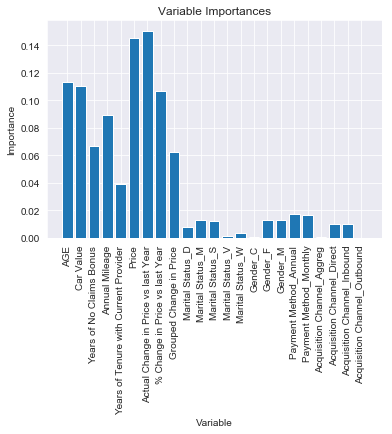

In [180]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Model with most important features

In [184]:
# New random forest with only the two most important variables
rf_most_important = RandomForestClassifier(n_estimators= 1000, random_state=42)

# Extract the most important features
important_indices = [feature_list.index('Actual Change in Price vs last Year'), feature_list.index('Price'), 
                     feature_list.index('AGE'), feature_list.index('Car Value'), feature_list.index('% Change in Price vs last Year'), 
                     feature_list.index('Annual Mileage'), feature_list.index('Years of No Claims Bonus'),
                     feature_list.index('Grouped Change in Price'), feature_list.index('Years of Tenure with Current Provider'),
                     feature_list.index('Payment Method_Annual'), feature_list.index('Payment Method_Monthly'),
                     feature_list.index('Gender_F'), feature_list.index('Gender_M'),
                     feature_list.index('Acquisition Channel_Direct'), feature_list.index('Acquisition Channel_Inbound'),
                     feature_list.index('Marital Status_D'), feature_list.index('Marital Status_M'),
                     feature_list.index('Marital Status_S')
                    ]


# important_indices = [feature_list.index('Actual Change in Price vs last Year'), feature_list.index('Price'), 
#                      feature_list.index('AGE'), feature_list.index('Car Value'), feature_list.index('% Change in Price vs last Year'), 
#                      feature_list.index('Annual Mileage'), feature_list.index('Years of No Claims Bonus')
#                     ]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))

Mean Absolute Error: 0.31 degrees.
Accuracy: 0.6858141858141859
